# Análisis de complejidad computacional para el ejercicio de la Sesión 1

Nombre: Carlos Javier Bravo Intriago

Link:   https://colab.research.google.com/drive/1TSyWUitOgS7Cf8TBK5rnsyKRYjkyYslx?usp=sharing

Github: https://github.com/carlosbravo1408/03MIAR-Algoritmos-de-Optimizacion-2025/tree/main/AportesForo/EjercicioSesion1.ipynb

<!--
El profesor ha mencionado en clases que este documento o parte de su contenido
fue generado por IA generativa, lo cual no es cierto, a mi parecer, mi
explicacion es muy escueta y simplista, con un buen uso de Markdown y Latex,
El codigo en su mayoria fueron los propuestos en clases, excepto la variante
4 y 5 que fueron creados en base a sugerencias o en los ejemplos previos.

Las mediciones de tiempo y de memoria son codigos basados en ejemplos de la
documentacion oficial.

La graficacion (el codigo fuente de) se tomo como referencia lo impartido en la
asignatura 01-MIAR Python para la IA.
 -->

Dada dos listas con valores numéricos, encontrar los elementos en común a estas dos listas:

In [1]:
A = [1,2,6,7,12,13,15]
B = [2,3,4,7,13]

El resultado esperado es:

```python
(2,7,13)
```

## Propuesta 1

In [2]:
_A = set(A)
_B = set(B)
result = list(_A.intersection(_B))
result

[2, 13, 7]

O su variante mas compacta:

In [3]:
result = list(set(A).intersection(set(B)))
result

[2, 13, 7]

### Análisis de complejidad de tiempo:

Partamos por el hecho de que convertir una `list` a un `set` es en promedio de complejidad lineal, dado que implica iterar sobre la lista e insertar elementos en una tabla hash. Por tanto:

* `set(A)`:$O(N)$
* `set(B)`:$O(M)$

El método `intersection` de la clase o del tipo `set` iterará sobre el conjunto más pequeño (menor cardinalidad) y verificará la pertenencia en el más grande (mayor cardinalidad). Dado que la búsqueda en un `hash map` tiene un costo promedio de $O(1)$ (asumiendo bajas o nulas colisiones), entonces podemos definir que:

* La intersección entre `set(A)` y `set(B)` es de complejidad $O(min(N, M))$ que sigue siendo lineal.

Sumando las operaciones de construcción e intersección se obtiene:
$$
O(N+M)
$$
La complejidad en tiempo es Lineal.

## Propuesta 2 (List Comprehension)

In [4]:
result = [x for x in A if x in B]
result

[2, 7, 13]

### Análisis de complejidad de tiempo:
Procedemos de lo externo a lo interno.

El bucle más externo (`for x in A`) es de complejidad $O(N)$, ya que itera por cada elemento de la lista

La búsqueda interna (`if x in B`): por ser A una lista, la palabra reservada `in` en este contexto implica que recorre elemento a elemento hasta encontrar el elemento que se desea o llegara al final de la lista, en otras palabras es una búsqueda de complejidad lineal $O(M)$.

El uso de la palabra reservada `in` sobre una lista invoca al método `__cointains__`. Dado que las listas en Python no son tablas hash, este método debe realizar una búsqueda secuencial sobre el array.

Dado que dicha búsqueda está dentro del bucle más externo, la complejidad se puede traducir como:
$$
O(N\cdot M)
$$
Al ser un producto, esto implica que la complejidad es Cuadrática.

## Propuesta 3 (Bucle dentro de otro bucle)


In [5]:
C = []
for i in range(len(B)):
	if B[i] in A:
		C.append(B[i])
C

[2, 7, 13]

Este caso es muy similar al anterior, dado que el bucle externo es de complejidad $O(N)$, ya que recorre cada elemento de la lista `B`.

La condición `if B[i] in A` al ser `A` una lista, ocurre lo mismo que en el caso anterior, siendo esta búsqueda en promedio de complejidad $O(M)$.

Por ende la complejidad de este algoritmo es:
$$
O(N\cdot M)
$$
Complejidad Cuadrática.

## Propuesta 4 (un híbrido entre list comprehension y uso de sets)

In [6]:
set_a = set(A)
result = [b for b in B if b in set_a]
result

[2, 7, 13]

### Análisis de complejidad de tiempo:

Convertir una `list` a un `set` es en promedio de complejidad lineal. Por tanto:

* `set(A)`:$O(N)$

El bucle `B` recorre por cada elemento ($O(M)$); salvo que en este caso la condición `if b in set_a` ahora tiene un costo $O(1)$.

El uso de la palabra reservada `in` sobre un `set` también invoca al método `__cointains__`. Sin embargo, dado que los conjuntos o `set` en Python *si* son tablas hash, el resultado de esta búsqueda tiene una complejidad constante $O(1)$.

Sumando las operaciones de construcción e intersección se obtiene:
$$
O(N+M)
$$
La complejidad en tiempo es Lineal.

# Análisis comparativo y consideraciones técnicas.

Más allá de la complejidad temporal, existen matices críticos a considerar al elegir alguna de estas implementaciones.

## Consideraciones en Complejidad Espacial

Las propuestas 2 y 3, representan en espacio de memoria o de complejidad  espacial $O(1)$, ya que no crean estructuras de datos intermedias, solo consumen memoria para la lista resultante final

Por otra parte, la propuesta 1 requiere crear dos tablas `hash` completas en memoria antes de calcular el resultado. Esto implica una complejidad espacial $O(N+M)$.

La propuesta 4 pese a que requiere memoria extra, es menos que la propuesta 1, la complejidad espacial sería $O(N)$.

En el caso hipotético que estemos en un sistema con recursos limitados de memoria, las propuestas más rápidas en tiempo podrían ser contraproducente, puesto que traería consigo un posible `Memory Error`.

## Diferencia en rendimiento a gran escala

Si asumimos que la memoria es lo suficientemente vasta, y con listas grandes, por ejemplo que A y B tengan $1×{10^4}$ elementos cada uno:

* Las propuestas 1 y 4 resolverían este problema en unos ~$2×{10^4}$ operaciones
* Por otra parte, las variantes de listas anidadas requerirían un aproximado de ~$1×{10^8}$ operaciones. Es una diferencia abismal.

## Orden de los elementos en el resultado

Si se desea preservar el orden de los elementos de las respectivas listas, la propuesta 1 no cumpliría este requerimiento, por lo que sería necesario agregar un ordenado al resultado final, que implicaría agregar una complejidad de $O(N log N)$ en el mejor escenario con un buen algoritmo de ordenamiento.
Para resolver el problema antes mencionado, la propuesta 4 permite conservar el orden de los elementos de las listas A y B

## Resumen

|                     | Propuesta 1                                  | Propuesta 2 y Propuesta 3                             | Propuesta 4                                 |
| ------------------- |----------------------------------------------| ----------------------------------------------------- |---------------------------------------------|
| Complejidad Tiempo  | $O(N+M)$ Lineal                              | $O(N\cdot M)$ Cuadrática                              | $O(N+M)$ Lineal                             |
| Complejidad Espacio | $O(N+M)$                                     | $O(1)$                                                | $O(N)$                                    |
| Orden               | No garantizado, requiere ordenamiento extra. | Se mantiene si las listas de entrada están ordenadas. | Se mantiene si las listas de entrada están ordenadas. |

## Validacion

In [7]:
from typing import List, Tuple, Callable
import timeit
import tracemalloc
import random
import bisect

import matplotlib.pyplot as plt

In [8]:
def variant_1(list_a: List[int], list_b: List[int]) -> List[int]:
    # uso de set.intersection()
    return list(set(list_a).intersection(set(list_b)))

def variant_2(list_a: List[int], list_b: List[int]) -> List[int]:
    # List Comprehension
    return [x for x in list_a if x in list_b]

def variant_3(list_a: List[int], list_b: List[int]) -> List[int]:
    # Ciclo For Anidado
    C = []
    for i in range(len(list_b)):
        if list_b[i] in list_a:
            C.append(list_b[i])
    return C

def variant_4(list_a: List[int], list_b: List[int]) -> List[int]:
    # List comprehension y set
    set_a = set(list_a)
    return [b for b in list_b if b in set_a]

def variant_5(list_a: List[int], list_b: List[int]) -> List[int]:
    # Variante con complejidad cuasi-lineal O(NlogN) explicada en el foro
    lower_cardinality = list_a if len(list_a) < len(list_b) else list_b
    lower_cardinality.sort()
    output = []
    for b in list_b:
        idx = bisect.bisect_left(lower_cardinality, b)
        if idx < len(lower_cardinality) and lower_cardinality[idx] == b:
            output.append(b)
    return output


In [9]:
def generate_lists(size: int) -> Tuple[List[int], List[int]]:
    rango = size * 2
    list_a = [random.randint(0, rango) for _ in range(size)]
    list_b = [random.randint(0, rango) for _ in range(size)]
    return list_a, list_b

def measure_memory(
    func: Callable[[List[int], List[int]], List[int]],
    list_a: List[int],
    list_b: List[int]
) -> int:
    tracemalloc.start()
    func(list_a, list_b)
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return peak

In [10]:
sizes = [5, 10, 50, 100, 500, 1_000, 5_000, 10_000]
algorithms = {
    "Uso de HashMaps": variant_1,
    "List Comprehension": variant_2,
    "Ciclo for Anidado": variant_3,
    "Hibrido Set Comprehension y Lista": variant_4,
    "Ordenamiento y Búsqueda Binaria": variant_5,
}

results = {
    name: {"times": [], "memory": []} for name in algorithms
}

for size in sizes:
    A, B = generate_lists(size)
    for name, func in algorithms.items():
        t = timeit.Timer(lambda: func(A, B))
        times = t.repeat(repeat=3, number=1)
        avg_time = sum(times) / len(times)
        peak = 0
        for _ in range(3):
            peak += measure_memory(func, A, B)
        peak /= 3
        results[name]["times"].append(avg_time)
        results[name]["memory"].append(peak)


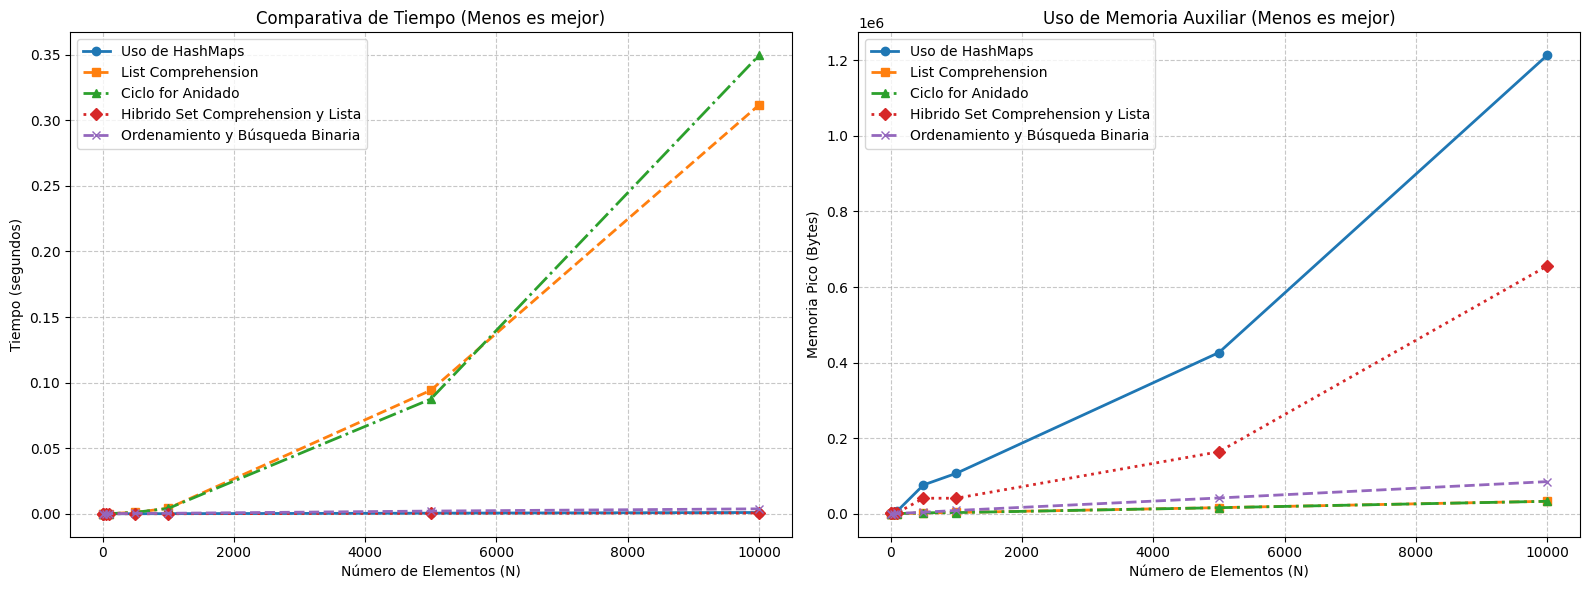

In [11]:
# Comparación todos los algoritmos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

styles = ['o-', 's--', '^-.', 'D:', "x--"]

for i, (name, metrics) in enumerate(results.items()):
    valid_times = [metric for metric in metrics["times"]]
    ax1.plot(sizes, valid_times, styles[i], label=name, linewidth=2)

    valid_mem = [metrics for metrics in metrics["memory"]]
    ax2.plot(sizes, valid_mem, styles[i], label=name, linewidth=2)

ax1.set_title("Comparativa de Tiempo (Menos es mejor)")
ax1.set_xlabel("Número de Elementos (N)")
ax1.set_ylabel("Tiempo (segundos)")
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend()

ax2.set_title("Uso de Memoria Auxiliar (Menos es mejor)")
ax2.set_xlabel("Número de Elementos (N)")
ax2.set_ylabel("Memoria Pico (Bytes)")
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend()

plt.tight_layout()
plt.show()

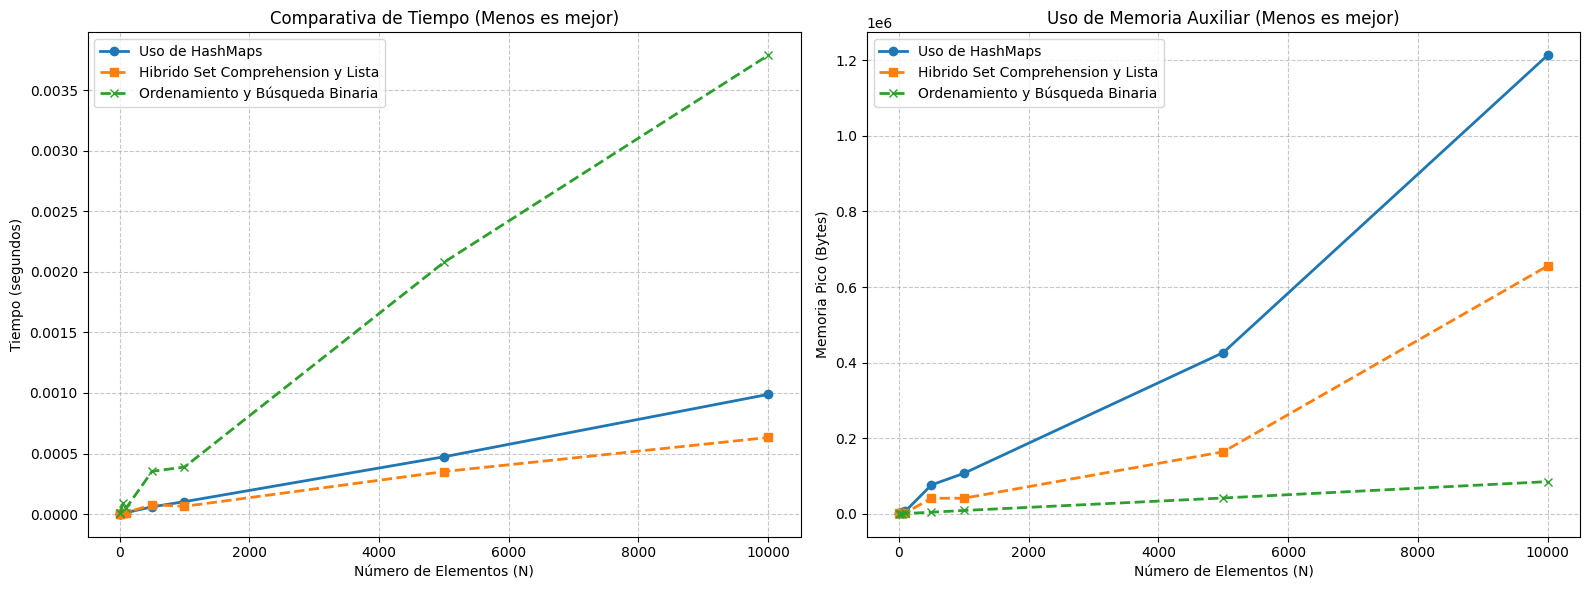

In [12]:
# Comparación Algoritmos Lineales y Cuasi-Lineal
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

styles = ['o-', 's--', "x--"]
variants = [
    "Uso de HashMaps",
    "Hibrido Set Comprehension y Lista",
    "Ordenamiento y Búsqueda Binaria"
]
results2 = {k: v for k, v in results.items() if k in variants}

for i, (name, metrics) in enumerate(results2.items()):
    valid_times = [metric for metric in metrics["times"]]
    ax1.plot(sizes, valid_times, styles[i], label=name, linewidth=2)

    valid_mem = [metrics for metrics in metrics["memory"]]
    ax2.plot(sizes, valid_mem, styles[i], label=name, linewidth=2)

ax1.set_title("Comparativa de Tiempo (Menos es mejor)")
ax1.set_xlabel("Número de Elementos (N)")
ax1.set_ylabel("Tiempo (segundos)")
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend()

ax2.set_title("Uso de Memoria Auxiliar (Menos es mejor)")
ax2.set_xlabel("Número de Elementos (N)")
ax2.set_ylabel("Memoria Pico (Bytes)")
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend()

plt.tight_layout()
plt.show()

# Pensamientos finales

Al observar la gráfica de la izquierda, se evidencia que las propuestas 1 y 4 mantienen una complejidad lineal $(O(N))$, resolviendo el problema en menor tiempo. En contraste, las propuestas 2 y 3 muestran una degradación drástica en el rendimiento: conforme aumenta el tamaño de las listas, el tiempo de ejecución crece cuadráticamente.

Sin embargo, al analizar el consumo de memoria, las propuestas 2 y 3 resultan ser más eficientes. Esto se debe a que operan directamente sobre las listas originales sin crear estructuras de datos auxiliary (como los `sets` de las otras propuestas), evitando asi la duplicación de información en la memoria RAM.

## Referencias
https://docs.python.org/3/library/stdtypes.html#set.intersection

https://docs.python.org/3/tutorial/datastructures.html

https://www.geeksforgeeks.org/python/python-in-keyword/

https://stackoverflow.com/a/55032431

https://docs.python.org/3/reference/expressions.html#membership-test-operations
